In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.preprocessing import StandardScaler

Importing Data

In [3]:
df = pd.read_csv("./airline_costs.csv")
df2 = pd.read_csv("./kang_nasal.csv")

Let's take a look our airline costs.

In [5]:
df.head()

,Airline,Length of Flight (miles),Speed of Plane (mph),Daily Flight Time Per Plane (hours),Population Served (1000s),Total Operating Costs (cents per revenue ton-mile),Revenue Tons Per Aircraft Mile,Ton-Mile Load Factor (Proportion),Available Capacity (Tons Per Mile),"Total Assets ($100,000s)","Investments and Special Funds ($100,000s)","Adjusted Assets ($100,000s)"
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


We seem to be working with data that hints towards airliner value: how expensive are flights given the amount of people it serves and length of each trip?

In [8]:
df.shape

(31, 12)

We are working with an extremely small dataset; a little over thirty observations and twelve features. 

In [7]:
df.isna().sum().sum()

0

Thankfully we are working with data that is without missing values.

We were taskd with working with simple linear regression today. The focal point for the first objective is determining the population count served based on the airliner's flight length and flight time. 

In [9]:
X = df[['Length of Flight (miles)','Daily Flight Time Per Plane (hours)']]
X = sm.add_constant(X)
y = df[['Population Served (1000s)']]

linmod = sm.OLS(y,X).fit()
print(linmod.summary())

                                OLS Regression Results                               
Dep. Variable:     Population Served (1000s)   R-squared:                       0.622
Model:                                   OLS   Adj. R-squared:                  0.595
Method:                        Least Squares   F-statistic:                     23.00
Date:                       Mon, 01 Mar 2021   Prob (F-statistic):           1.23e-06
Time:                               00:53:00   Log-Likelihood:                -330.06
No. Observations:                         31   AIC:                             666.1
Df Residuals:                             28   BIC:                             670.4
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

After testing the relationship, it seems that flight length has a positive relationship to the number of people served and flight time has a negative relationship. This is a strange finding given how the two features are related (longer flights require more flight time).

That said, the p-value for the daily flight time feature is especially weak, so this finding should be taken with a grain of salt.

If we insert our own datapoint, then we can see our location along the linear model. 

In [12]:
Xt = [[200, 7.2]]
Xt = sm.add_constant(Xt, has_constant='add')

ynhat = linmod.predict(Xt)
ynhat[0]

27331.034616819252

Next up, we'll look at the relationship between total assets and the population count served.

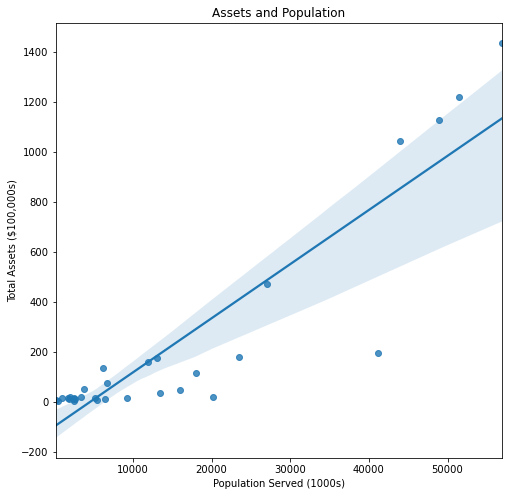

In [25]:
plt.figure(figsize = (8,8))
sns.regplot(data = df, x = 'Population Served (1000s)', y = 'Total Assets ($100,000s)')
plt.title("Assets and Population");

In [26]:
## LR 2
x2 = df[['Population Served (1000s)']]
y2 = df[['Total Assets ($100,000s)']]

x2 = sm.add_constant(x2)
lmod = sm.OLS(y2,x2).fit()
print(lmod.summary())
xn = [20300]
xn = sm.add_constant(xn, has_constant='add')

yhat = lmod.predict(xn)

                               OLS Regression Results                               
Dep. Variable:     Total Assets ($100,000s)   R-squared:                       0.819
Model:                                  OLS   Adj. R-squared:                  0.812
Method:                       Least Squares   F-statistic:                     130.9
Date:                      Mon, 01 Mar 2021   Prob (F-statistic):           2.85e-12
Time:                              01:11:46   Log-Likelihood:                -202.95
No. Observations:                        31   AIC:                             409.9
Df Residuals:                            29   BIC:                             412.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

No surprise, there is a strong positive relationship between the number of people an airliner serves and its total assets.

Next up we will perform a comparison between the linear regression function showcased above and the gradient descent algorithm shown below. 

In [27]:
## Problem 2
def grad_descent(X, y, alpha, epsilon):
    iteration = [0]
    i = 0
    theta = np.ones(shape=(len(df2.columns), 1))
    cost = [np.transpose(X @ theta - y) @ (X @ theta - y)]
    delta = 1
    while (delta>epsilon):
        theta = theta - alpha*((np.transpose(X)) @ (X @ theta - y))
        cost_val = (np.transpose(X @ theta - y)) @ (X @ theta - y)
        cost.append(cost_val)
        delta = abs(cost[i+1]-cost[i])
        if ((cost[i+1]- cost[i]) > 0):
            print("The cost is increasing. Try reducing alpha.")
            break
        iteration.append(i)
        i += 1
        
    print("Completed in %d iterations." %(i))
    return(theta)

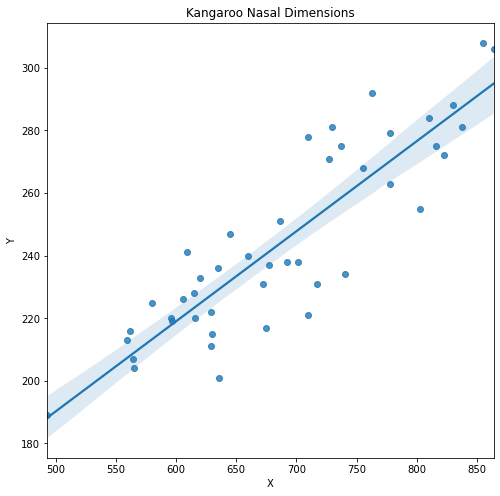

In [41]:
plt.figure(figsize = (8,8))
sns.regplot(data = df2, x = 'X', y = 'Y')
plt.title("Kangaroo Nasal Dimensions");

In [37]:
scale = StandardScaler()
X3 = scale.fit_transform(df2[['X']])
X3 = pd.concat((pd.DataFrame([1] * len(df2)), pd.DataFrame(X3)), axis = 1).to_numpy()
y3 = df2[['Y']].to_numpy()
grad_descent(X3, y3, 0.0001, 10e-10)

Completed in 3418 iterations.


array([[244.15550647],
       [ 26.34297118]])

In [38]:
X = df2[['X']]
X = sm.add_constant(X4)
y = df2[['Y']]
lm = sm.OLS(y, X).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.34e-15
Time:                        01:20:03   Log-Likelihood:                -182.98
No. Observations:                  45   AIC:                             370.0
Df Residuals:                      43   BIC:                             373.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4508     16.300      2.850      0.0